# 선형분류
> "scikit-learn 예제를 통해서 선형분류를 알아보자"

- toc:true
- branch: master
- badges: true
- comments: true
- author: 이정승
- categories: [classification,python,jupyter,machine_learning]

선형 분류는 어떤 데이터를 선형결정경계를 통해 클래스를 부여하는 모델이다.
사이킷런에서 제공하는 유방암 데이터를 이용해 선형 분류 모델을 만들어 보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [4]:
cancer.data[:3]  #3개의 로우 확인 (자료형이 어떤지를 확인하는 과정)

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

<function matplotlib.pyplot.show>

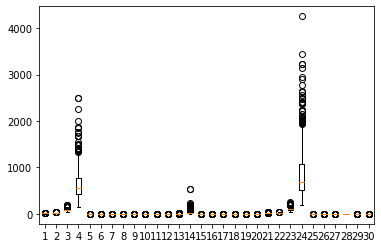

In [5]:
plt.boxplot(cancer.data)       #박스플랏으로 데이터 분포 확인
plt.show                     #4번째와 24번 속성에서 두드러진다.

In [11]:
print(cancer.feature_names)  #각 attribute들의 이름
print(cancer.feature_names[3])
print(cancer.feature_names[13])
print(cancer.feature_names[23])
# 4번째는 mean area, 14번째는 area error, 24번째는 worst area

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
mean area
area error
worst area


In [7]:
X = cancer.data[:500]
y = cancer.target[:500]

## 로지스틱 회귀 모델



In [8]:
class LogisticRegression:
  # 1. 회귀를 먼저 작성
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self,x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self,x,err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  # 2. 활성화 함수를 작성
  # sigmoid를 사용하였다.
  #클리핑을 통해 일정 값을 넘어가는 것은 제거y,epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i,err)
        self.w -= w_grad
        self.b -= b_grad

  # 3. 임계함수를 작성
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a> 0.5


In [9]:
lr = LogisticRegression()
lr.fit(X,y)

In [10]:
np.mean(lr.predict(cancer.data[501:]) == cancer.target[501:])
#정확도를 계산해보자.

0.8970588235294118